necessary videos

In [131]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

print(tf. __version__)

2.8.3


In [35]:
# from calendar import EPOCH


IMAGE_SIZE = 256
BATCH_SIZE = 32   #Standard batch size
CHANNELS = 3
EPOCHS = 10


In [36]:
# Specify directory first
# one call will load all the images into tensorflow


In [37]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", #directory
    shuffle=True,   # To randomly shuffle the images.
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 2152 files belonging to 3 classes.


In [38]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [39]:
# 68 * 32
len(dataset)

68

In [40]:
#explore images.
for image_batch, label_batch in dataset.take(1):
    # print(image_batch.shape)
    # print(image_batch[0])
    # print(image_batch[0].numpy())  #convert it into numpy
    print(image_batch[0].shape)

    # Every element that you get is a tensor,so you need to
    #  convert it to numpu
    # print(label_batch.numpy())

(256, 256, 3)


Visualize images.

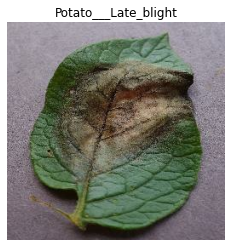

In [41]:
for image_batch, label_batch in dataset.take(1):
    # plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.imshow(image_batch[0].numpy().astype("uint8"))


    # labelling the title
    plt.title(class_names[label_batch[0]])
    # Remove the axis labeling
    plt.axis("off")

Displaying a many images once

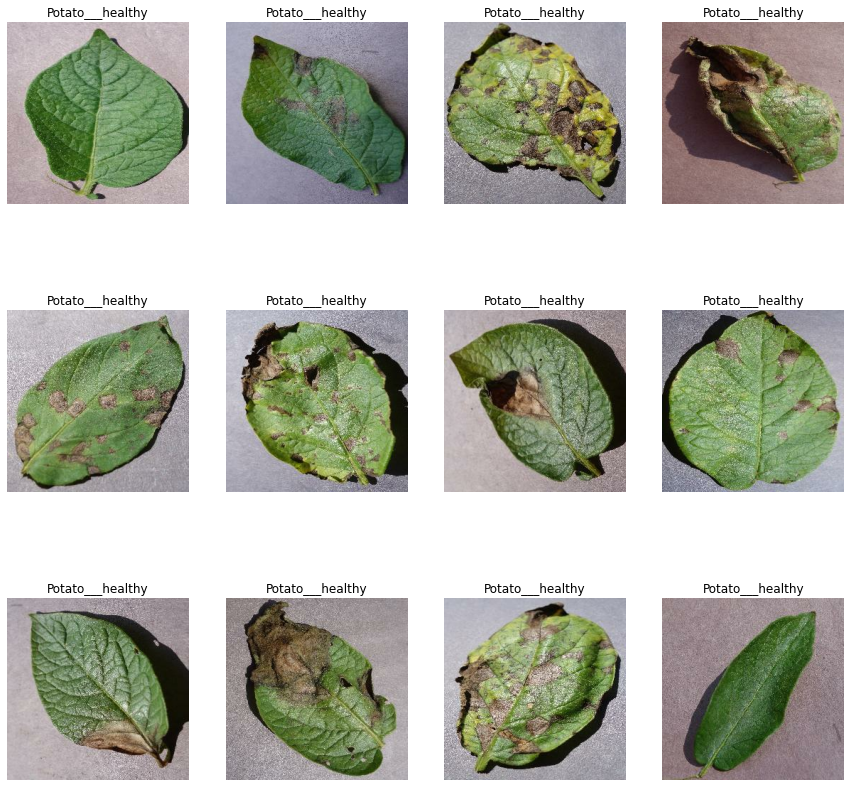

In [42]:
#Increase the dimension
plt.figure(figsize=(15, 15))
for image_batch, label_batch in dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(3, 4, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # labelling the title
        plt.title(class_names[label_batch[0]])
        # Remove the axis labeling
        plt.axis("off")

Spliting our dataset into training and testing

In [43]:
len(dataset)

68

In [44]:
#  80% ==> training
#  20% ==> 10% validation, 10 % test

In [45]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

I will take 54

In [46]:
train_ds = dataset.take(54)
len(train_ds)

54

The ramaining will  be for test

In [47]:
test_ds = dataset.skip(54)
len(test_ds)

14

I need 10% for validation

In [48]:
val_size = 0.1
len(dataset) *val_size

6.800000000000001

In [49]:
# Taking 10 % from training dataset
val_ds = test_ds.take(6)
len(val_ds)

6

In [50]:
# The actual testind dataset. 
test_ds = test_ds.skip(6)
len(test_ds)

8

Creating a function

In [51]:


def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)




    return train_ds, val_ds, test_ds

In [52]:
# Calling the function above
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [53]:
print(f"Length of train dataset is : {len(train_ds)}")
print(f"Length of validation dataset is : {len(val_ds)}")
print(f"Length of test dataset is : {len(test_ds)}")


Length of train dataset is : 54
Length of validation dataset is : 6
Length of test dataset is : 8


caching. In data science, repetitions of the same routines could be cached to speed the experiments or decrease data access latency. The most straightforward adaptation policy is to take advantage of the locality of reference principle.

In [54]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)



Preprocessing

In [55]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    # Preprocessing API
    layers.experimental. preprocessing.Rescaling(1.0/255)
    ])

Argumentation

In [56]:
data_augumentation = tf.keras.Sequential(
    [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
    ]
)

Creating the Model

In [57]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    # resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32,(3, 3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation ='softmax'),


]
    
)
model.build(input_shape=input_shape)

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 60, 60, 64)         

In [59]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Training the network


In [60]:
# from tabnanny import verbose


history = model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 228s 4s/step - loss: 1.7933 - accuracy: 0.5179 - val_loss: 0.7287 - val_accuracy: 0.7135
Epoch 2/10
54/54 [==============================] - 205s 4s/step - loss: 0.5043 - accuracy: 0.7975 - val_loss: 0.4088 - val_accuracy: 0.8438
Epoch 3/10
54/54 [==============================] - 202s 4s/step - loss: 0.3629 - accuracy: 0.8519 - val_loss: 0.4720 - val_accuracy: 0.8073
Epoch 4/10
54/54 [==============================] - 206s 4s/step - loss: 0.2456 - accuracy: 0.9005 - val_loss: 0.4740 - val_accuracy: 0.7917
Epoch 5/10
54/54 [==============================] - 203s 4s/step - loss: 0.2271 - accuracy: 0.9115 - val_loss: 0.2033 - val_accuracy: 0.9115
Epoch 6/10
54/54 [==============================] - 251s 5s/step - loss: 0.2241 - accuracy: 0.9236 - val_loss: 0.2981 - val_accuracy: 0.8698
Epoch 7/10
54/54 [==============================] - 270s 5s/step - loss: 0.2398 - accuracy: 0.9086 - val_loss: 0.2637 - val_accuracy: 0.9010
Epoch 8/10
54

#  run the test dataset

In [61]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 13s 1s/step - loss: 0.2038 - accuracy: 0.9062


In [62]:
scores

[0.20379576086997986, 0.90625]

In [63]:
history

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Ploting Training Accuracy and Validation accuracy

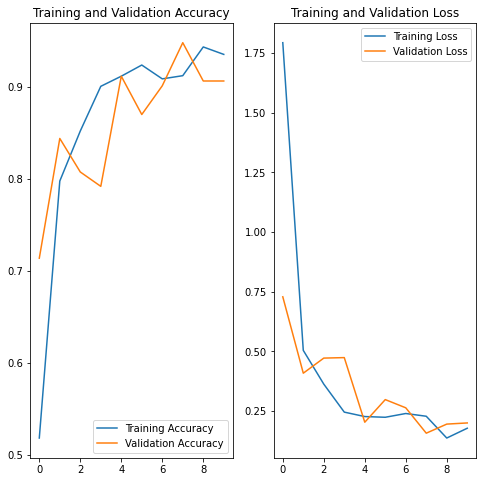

In [77]:
from cProfile import label


plt.figure(figsize= (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()


first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


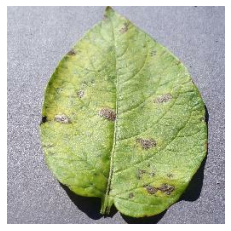

In [158]:
for images_batch, labels_batch in test_ds.take(1):
    # How to display image
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")

    plt.imshow(first_image)
    plt.axis("off")
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [151]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)    # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

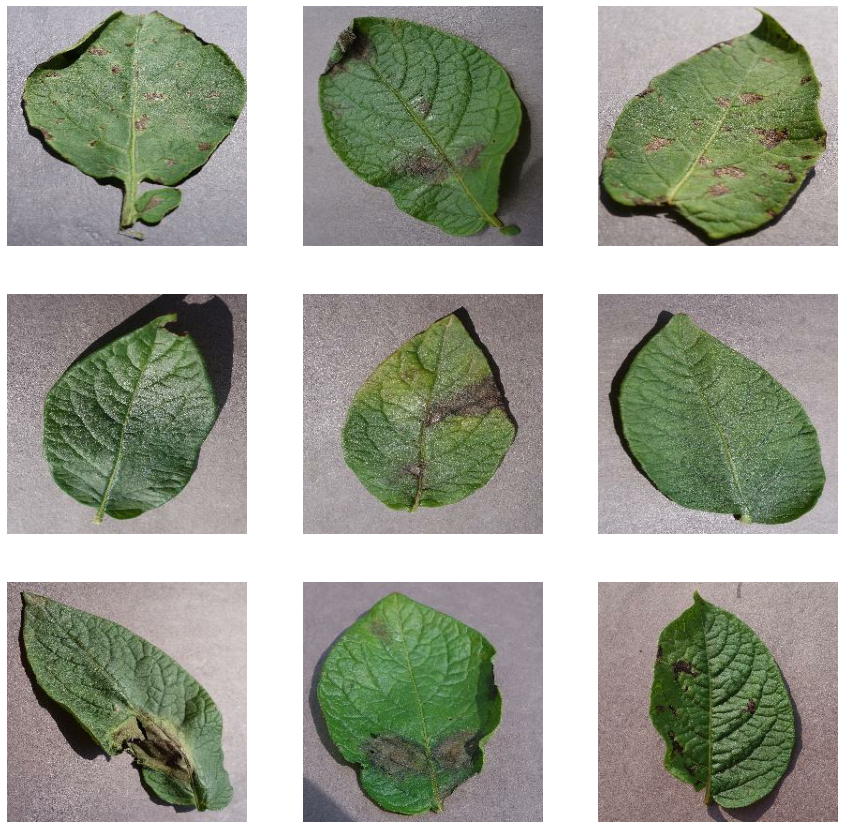

In [157]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

    for i in range(9):
        # To show all the images
        ax = plt.subplot(3, 3, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
